In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.express as px
#import plotly.graph_objects as go
import random
import time as tm

# import datetime 
from datetime import datetime, timedelta
# from numpy import random
from random import randrange
from random import choices
# from random import choices, random

In [4]:
pwd

'/Users/tosinoyewale/Desktop/Spiced/personal_github_account/supermarket-simulation/scratch work'

In [7]:
df = pd.read_csv('/Users/tosinoyewale/Desktop/Spiced/personal_github_account/supermarket-simulation/data_customer/wednesday.csv', delimiter = ';', parse_dates=True)

In [8]:
df.head(5)

,timestamp,customer_no,location
0,2019-09-04 07:00:00,1,fruit
1,2019-09-04 07:00:00,2,dairy
2,2019-09-04 07:00:00,3,fruit
3,2019-09-04 07:00:00,4,fruit
4,2019-09-04 07:00:00,5,dairy


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    5050 non-null   object
 1   customer_no  5050 non-null   int64 
 2   location     5050 non-null   object
dtypes: int64(1), object(2)
memory usage: 118.5+ KB


## Exploratory data analysis

### what is the total number of customers in each section

In [4]:
df.groupby('location')['customer_no'].count()

location
checkout    1526
dairy        976
drinks       775
fruit       1043
spices       730
Name: customer_no, dtype: int64

### what is the total number of customers in each section over time

In [7]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [8]:
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year
df['hour'] = df['timestamp'].dt.hour
df

,timestamp,customer_no,location,day,month,year,hour
0,2019-09-04 07:00:00,1,fruit,4,9,2019,7
1,2019-09-04 07:00:00,2,dairy,4,9,2019,7
2,2019-09-04 07:00:00,3,fruit,4,9,2019,7
3,2019-09-04 07:00:00,4,fruit,4,9,2019,7
4,2019-09-04 07:00:00,5,dairy,4,9,2019,7
...,...,...,...,...,...,...,...
5045,2019-09-04 21:48:00,1528,spices,4,9,2019,21
5046,2019-09-04 21:49:00,1520,dairy,4,9,2019,21
5047,2019-09-04 21:49:00,1529,dairy,4,9,2019,21
5048,2019-09-04 21:49:00,1530,fruit,4,9,2019,21


In [9]:
df_customer_over_time = df.groupby(['hour','location'])[['customer_no']].count().reset_index()
df_customer_over_time


,hour,location,customer_no
0,7,checkout,85
1,7,dairy,53
2,7,drinks,47
3,7,fruit,49
4,7,spices,45
...,...,...,...
70,21,checkout,56
71,21,dairy,29
72,21,drinks,29
73,21,fruit,28


In [10]:
g = df.groupby(['hour', 'location']).count().reset_index()
g

,hour,location,timestamp,customer_no,day,month,year
0,7,checkout,85,85,85,85,85
1,7,dairy,53,53,53,53,53
2,7,drinks,47,47,47,47,47
3,7,fruit,49,49,49,49,49
4,7,spices,45,45,45,45,45
...,...,...,...,...,...,...,...
70,21,checkout,56,56,56,56,56
71,21,dairy,29,29,29,29,29
72,21,drinks,29,29,29,29,29
73,21,fruit,28,28,28,28,28


<AxesSubplot:xlabel='hour', ylabel='customer_no'>

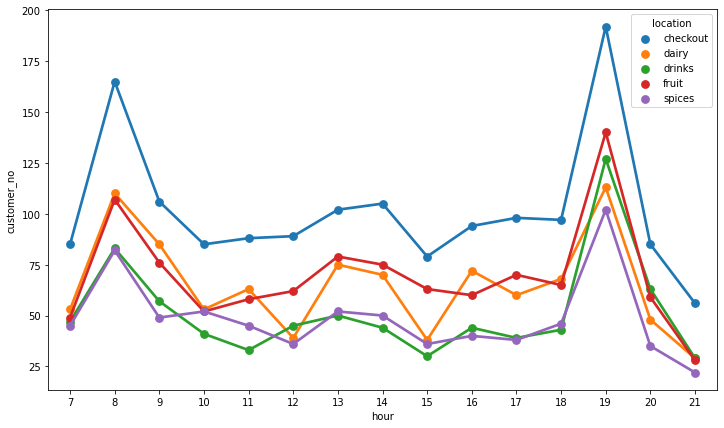

In [11]:
plt.figure(figsize=(12, 7))
sns.pointplot(data=g, x="hour", y="customer_no", hue="location")

### Question 3: Display the number of customers at checkout over time

In [12]:
df_checkout = df[df.location == 'checkout']
df_checkout

,timestamp,customer_no,location,day,month,year,hour
7,2019-09-04 07:01:00,5,checkout,4,9,2019,7
9,2019-09-04 07:02:00,1,checkout,4,9,2019,7
10,2019-09-04 07:02:00,6,checkout,4,9,2019,7
12,2019-09-04 07:03:00,4,checkout,4,9,2019,7
20,2019-09-04 07:04:00,9,checkout,4,9,2019,7
...,...,...,...,...,...,...,...
5032,2019-09-04 21:45:00,1525,checkout,4,9,2019,21
5035,2019-09-04 21:46:00,1516,checkout,4,9,2019,21
5039,2019-09-04 21:47:00,1526,checkout,4,9,2019,21
5044,2019-09-04 21:48:00,1522,checkout,4,9,2019,21


In [13]:
df_checkout.groupby('timestamp')[['location']].count()

,location
timestamp,
2019-09-04 07:01:00,1
2019-09-04 07:02:00,2
2019-09-04 07:03:00,1
2019-09-04 07:04:00,1
2019-09-04 07:05:00,1
...,...
2019-09-04 21:45:00,3
2019-09-04 21:46:00,1
2019-09-04 21:47:00,1


### how much time did each customer spend in the market

In [11]:
customers_list = list(df['customer_no'].unique())


In [15]:
list_times = []
for i in customers_list:
    z = df.loc[df['customer_no']==i]
    z.iloc[0]['timestamp']
    z.iloc[-1]['timestamp']
    c = pd.Timedelta(z.iloc[-1]['timestamp'] - z.iloc[0]['timestamp']).seconds / 3600.0
    list_times.append(c)
    name = ["time_in_store(secs)"]
    results = pd.DataFrame(data=list_times, columns=name)

In [16]:
results

,time_in_store(secs)
0,0.033333
1,0.100000
2,0.183333
3,0.050000
4,0.016667
...,...
1526,0.050000
1527,0.050000
1528,0.066667
1529,0.050000


### what is the total number of customers in the supermarket over time.¶

In [17]:
df.groupby('timestamp')[['customer_no']].count().reset_index()

,timestamp,customer_no
0,2019-09-04 07:00:00,6
1,2019-09-04 07:01:00,3
2,2019-09-04 07:02:00,2
3,2019-09-04 07:03:00,9
4,2019-09-04 07:04:00,3
...,...,...
864,2019-09-04 21:45:00,5
865,2019-09-04 21:46:00,4
866,2019-09-04 21:47:00,4
867,2019-09-04 21:48:00,3


### Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”)

In [18]:
first = []
following = []
for i in customers_list:
    e = df.loc[df['customer_no']==i]
    e = e.iloc[0]['location']
    first.append(e)
    f = df.loc[df['customer_no']==i]
    p = len(f.index) - 1
    following.append(p)
    results2 = pd.DataFrame(
    {'first': first,
     'following': following})


In [19]:
results2

,first,following
0,fruit,1
1,dairy,2
2,fruit,4
3,fruit,1
4,dairy,1
...,...,...
1526,dairy,2
1527,drinks,1
1528,spices,2
1529,dairy,2


In [20]:
r1 = results2.loc[results2['first']=="dairy"]
r2 = results2.loc[results2['first']=="spices"]
r3 = results2.loc[results2['first']=="fruit"]
r4 = results2.loc[results2['first']=="drinks"]

Text(0.5, 1.0, 'Drinks')

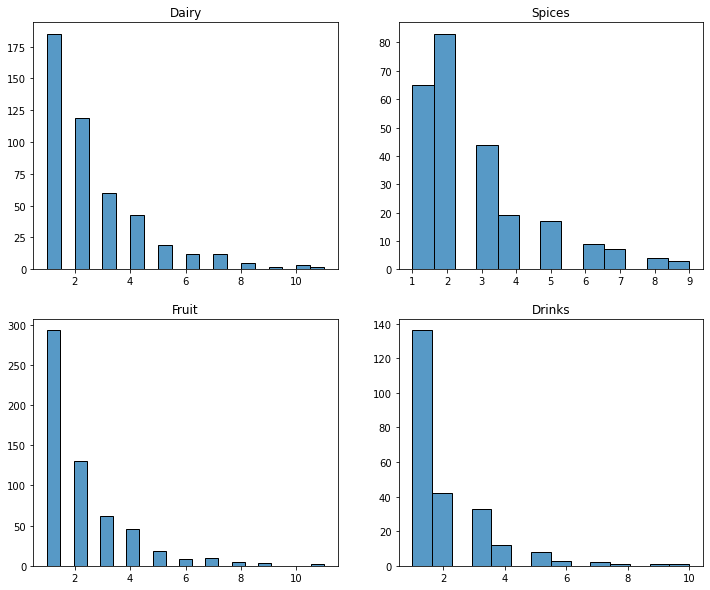

In [21]:
f, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=False);
e = sns.histplot(data=r1, x="following", ax=axes[0, 0]);
f = sns.histplot(data=r2, x="following", ax=axes[0, 1]);
g = sns.histplot(data=r3, x="following", ax=axes[1, 0]);
h = sns.histplot(data=r4, x="following", ax=axes[1, 1]);
e.set(xlabel='', ylabel='')
f.set(xlabel='', ylabel='')
g.set(xlabel='', ylabel='')
h.set(xlabel='', ylabel='')
e.set_title("Dairy")
f.set_title("Spices")
g.set_title("Fruit")
h.set_title("Drinks")

## MCMC

In [22]:
df

,timestamp,customer_no,location,day,month,year,hour
0,2019-09-04 07:00:00,1,fruit,4,9,2019,7
1,2019-09-04 07:00:00,2,dairy,4,9,2019,7
2,2019-09-04 07:00:00,3,fruit,4,9,2019,7
3,2019-09-04 07:00:00,4,fruit,4,9,2019,7
4,2019-09-04 07:00:00,5,dairy,4,9,2019,7
...,...,...,...,...,...,...,...
5045,2019-09-04 21:48:00,1528,spices,4,9,2019,21
5046,2019-09-04 21:49:00,1520,dairy,4,9,2019,21
5047,2019-09-04 21:49:00,1529,dairy,4,9,2019,21
5048,2019-09-04 21:49:00,1530,fruit,4,9,2019,21


In [23]:
df_sort = df.sort_values(by = 'customer_no')
df_sort.head(10)

,timestamp,customer_no,location,day,month,year,hour
0,2019-09-04 07:00:00,1,fruit,4,9,2019,7
9,2019-09-04 07:02:00,1,checkout,4,9,2019,7
1,2019-09-04 07:00:00,2,dairy,4,9,2019,7
25,2019-09-04 07:06:00,2,checkout,4,9,2019,7
23,2019-09-04 07:05:00,2,spices,4,9,2019,7
41,2019-09-04 07:11:00,3,checkout,4,9,2019,7
11,2019-09-04 07:03:00,3,drinks,4,9,2019,7
26,2019-09-04 07:06:00,3,fruit,4,9,2019,7
6,2019-09-04 07:01:00,3,spices,4,9,2019,7
2,2019-09-04 07:00:00,3,fruit,4,9,2019,7


In [24]:
df_sort['location_t+1']=df_sort['location'].shift(-1)
df_sort

,timestamp,customer_no,location,day,month,year,hour,location_t+1
0,2019-09-04 07:00:00,1,fruit,4,9,2019,7,checkout
9,2019-09-04 07:02:00,1,checkout,4,9,2019,7,dairy
1,2019-09-04 07:00:00,2,dairy,4,9,2019,7,checkout
25,2019-09-04 07:06:00,2,checkout,4,9,2019,7,spices
23,2019-09-04 07:05:00,2,spices,4,9,2019,7,checkout
...,...,...,...,...,...,...,...,...
5042,2019-09-04 21:47:00,1530,spices,4,9,2019,21,dairy
5037,2019-09-04 21:46:00,1530,dairy,4,9,2019,21,fruit
5048,2019-09-04 21:49:00,1530,fruit,4,9,2019,21,drinks
5038,2019-09-04 21:46:00,1531,drinks,4,9,2019,21,checkout


In [25]:
# calculate the frequencies between the previous location and the next location using crosstab
pd.crosstab(df_sort['location'], df_sort['location_t+1'])

location_t+1,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,205,362,288,424,246
dairy,380,98,146,207,145
drinks,284,149,68,151,123
fruit,444,197,145,116,141
spices,213,170,128,144,75


### normalizing it.

In [26]:
norm = pd.crosstab(df_sort['location'], df_sort['location_t+1'], normalize = 0)
norm

location_t+1,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,0.134426,0.237377,0.188852,0.278033,0.161311
dairy,0.389344,0.100410,0.149590,0.212090,0.148566
drinks,0.366452,0.192258,0.087742,0.194839,0.158710
fruit,0.425695,0.188878,0.139022,0.111218,0.135187
spices,0.291781,0.232877,0.175342,0.197260,0.102740


In [27]:
np.array(norm)

array([[0.13442623, 0.23737705, 0.18885246, 0.27803279, 0.16131148],
       [0.38934426, 0.10040984, 0.14959016, 0.21209016, 0.14856557],
       [0.36645161, 0.19225806, 0.08774194, 0.19483871, 0.15870968],
       [0.42569511, 0.18887824, 0.13902205, 0.11121764, 0.13518696],
       [0.29178082, 0.23287671, 0.17534247, 0.19726027, 0.10273973]])

# predicting the next location using the present location of a customer using MCMC

In [28]:
d = df_sort.location.unique()
sorted_list = sorted(d, key=str.lower)
sorted_list

['checkout', 'dairy', 'drinks', 'fruit', 'spices']

In [29]:
choices(sorted_list, weights = [0.2, 0.5, 0.3, 0.4, 0.6])

['spices']

In [30]:
def randomDate(start, end):
    frmt = '%d-%m-%Y %H:%M:%S'

    stime = tm.mktime(tm.strptime(start, frmt))
    etime = tm.mktime(tm.strptime(end, frmt))

    ptime = stime + random.random() * (etime - stime)
    dt = datetime.fromtimestamp(tm.mktime(tm.localtime(ptime)))
    return dt

random_datetime = randomDate("20-01-2018 13:30:00", "23-01-2018 04:50:34")

print(random_datetime)

2018-01-21 11:53:45


## Implement customer class our own class

In [31]:
class Customer:
    """ a single customer that moves through the market
    """
    def __init__(self, name, state, hour):
        self.name = name
        self.state = state
        #self.category = category #poor, middle_class, or rich
        self.expenditure = None #poor, middle_class, or rich
        self.transition_probabilities = np.random.random_sample((5,))
        self.transition_probabilities2 = np.random.random_sample((4,))
        self.hour = pd.to_datetime(hour)
        self.next_loc = None
        self.next_loc2 = None
   
    def first_state(self):
        print(f'{self.name} enters the supermarket at time {self.hour}')
    
    def next_state(self):
        self.next_loc = choices(['spices', 'drinks', 'fruit', 'dairy', 'checkout'], self.transition_probabilities)[0]
        self.hour_next =self.hour + timedelta(minutes=(random.randint(0,10)))
        print(f'{self.name} goes to {self.next_loc} at time {self.hour_next}')
        
    def subsequent_step(self):
        if self.next_loc=='checkout':
            print(f'{self.name} checks out at {self.hour_next}')
        else:
            self.next_loc2=choices(['spices', 'drinks', 'fruit', 'dairy'], self.transition_probabilities2)[0]
            self.hour_next2 =self.hour_next + timedelta(minutes=(random.randint(0, 10)))
            print(f'{self.name} moves to {self.next_loc2} at time {self.hour_next2}')
            
    def is_active(self):
        while (self.next_loc2!="checkout"):
            self.subsequent_step()
            

In [32]:
names= ['Tosin', 'Evelyn', 'Ketan', 'Paula', 'Nipun', 'Eva', 'Tobi', 'Francisco', 'Joseph', 'Erkan', 'Ugur', 'Arjun']
people = []

for name in names:
    state = choices(['spices', 'drinks', 'fruit', 'dairy'])
    hour = randomDate("20-01-2018 07:00:00", "23-01-2018 08:00:00")
    people.append(Customer(name, state, hour))                


In [33]:
people[0].first_state()
people[0].next_state()
people[0].subsequent_step()

# people[0].is_active()

Tosin enters the supermarket at time 2018-01-21 20:48:29
Tosin goes to drinks at time 2018-01-21 20:48:29
Tosin moves to dairy at time 2018-01-21 20:52:29


## Implement based on paula class and we added expenditure to it

In [34]:
STATES = ['entrance','checkout','dairy','drinks', 'fruits', 'spices']

PROBS = {
    'entrance': (0, 0.13442623, 0.23737705, 0.18885246, 0.27803279, 0.16131148),
    'checkout': (0, 1, 0, 0, 0, 0),
    'dairy':  (0, 0.38934426, 0.10040984, 0.14959016, 0.21209016, 0.14856557),
    'drinks': (0, 0.36645161, 0.19225806, 0.08774194, 0.19483871, 0.15870968),
    'fruits': (0, 0.42569511, 0.18887824, 0.13902205, 0.11121764, 0.13518696),
    'spices': (0, 0.29178082, 0.23287671, 0.17534247, 0.19726027, 0.10273973)
}

In [35]:
class Customer:
    """ """
    def __init__(self, id, expenditure):
        self.id = id
        self.state = 'entrance'
        self.active = True
        self.expenditure = expenditure
        self.exp_class = choices([0.7, 1, 1.3], [0.3, 0.6, 0.1])[0]
    
    def next_state(self):
        """"""
        self.state = random.choices(STATES, weights=PROBS[self.state])[0]
        if self.state == "fruits":
            self.expenditure = self.expenditure + 10*self.exp_class
        elif self.state == "drinks":
            self.expenditure + self.expenditure + 5*self.exp_class
        elif self.state == "spices":
            self.expenditure = self.expenditure + 5*self.exp_class
        elif self.state == "dairy":
            self.expenditure = self.expenditure + 10*self.exp_class
        elif self.state == "entrance":
            self.expenditure = 0
        else:
            self.expenditure = self.expenditure
        if self.state == "checkout":
                self.active = False
                   
#     def expenditures(self):
#         print(f"{self.expenditure}")      
        
    def __repr__(self):
        """"""
        return f"{self.id}, {self.state}, {self.expenditure}"

In [36]:
Evelyn = Customer(1,0)

In [37]:
Evelyn.next_state()

In [38]:
while Evelyn.active:
    print(Evelyn.state)
    Evelyn.next_state()
    if Evelyn.state == 'checkout':
        print('checkout')

dairy
checkout


In [39]:
NEW_CUSTOMERS_PER_MINUTE = 1.7

In [43]:

class Supermarket:
    """Simulates multiple customers"""

    def __init__(self,name):
        self.minutes = 0
        self.name = name
        self.customers = []
        self.last_id = 0
        self.expenditure = 0
    
    def n_customers(self):
        return len(self.customers)

    def time(self):
        hour = 7 + self.minutes // 60
        min = self.minutes % 60
        return f"{hour:02}:{min:02}:00"
        
    def next_minute(self):
        """propagates each customer"""
        self.minutes += 1
        for c in self.customers:
            c.next_state()
            self.print_row(c)
            
    def add_new_customers(self):
        """new customers randomly enter the shop"""
        n = np.random.poisson(NEW_CUSTOMERS_PER_MINUTE)
        for i in range(n):
            self.last_id += 1
            c = Customer(self.last_id, self.expenditure)
            self.customers.append(c)
            self.print_row(c)

    def remove_exited_customers(self):
        """removes custoemrs that are done shopping"""
        self.customers = [c for c in self.customers if c.active]

    def print_row(self, customer):
        """prints one row of CSV"""
        row = self.time() + ', ' + str(customer)
        print(row)
 

In [44]:
shoprite1 = Supermarket('shoprite')

In [45]:
shoprite1.add_new_customers()

07:00:00, 1, entrance, 0
07:00:00, 2, entrance, 0


In [46]:
shoprite1.next_minute()

07:01:00, 1, dairy, 7.0
07:01:00, 2, dairy, 7.0


In [48]:
shoprite1.add_new_customers()

07:01:00, 3, entrance, 0
07:01:00, 4, entrance, 0


In [49]:
shoprite1.next_minute()

07:02:00, 1, checkout, 7.0
07:02:00, 2, checkout, 7.0
07:02:00, 3, spices, 5
07:02:00, 4, checkout, 0
